In [ ]:
import random
import numpy as np

# UV类型及其数量限制
uv_limits = {
    'RO05': 50,
    'SY01': 100,
    'MT21': 150,
    'GE27': 100
}

# 总座位数
a = 20
b = 20
total_seats = a * b  # 400

def seat_init(total_seats, uv_limits):
  # 生成座位分配列表
  seating = []
  remaining_uvs = list(uv_limits.keys())

  # 当所有座位都被分配或没有更多的UV类型可分配时停止
  while len(seating) < total_seats and remaining_uvs:
    # 随机选择一个UV
    chosen_uv = random.choice(remaining_uvs)

    # 分配UV并减少其剩余数量
    seating.append(chosen_uv)
    uv_limits[chosen_uv] -= 1

    # 如果UV的数量达到限制，则从候选列表中移除
    if uv_limits[chosen_uv] == 0:
        remaining_uvs.remove(chosen_uv)

  # 检查是否所有座位都已分配
  if len(seating) < total_seats:
    print(f"只分配了{len(seating)}个座位，因为UV的数量限制。")

  return seating


In [ ]:
seating = seat_init(total_seats, uv_limits);
seating_matrix = np.array(seating).reshape(20, 20)

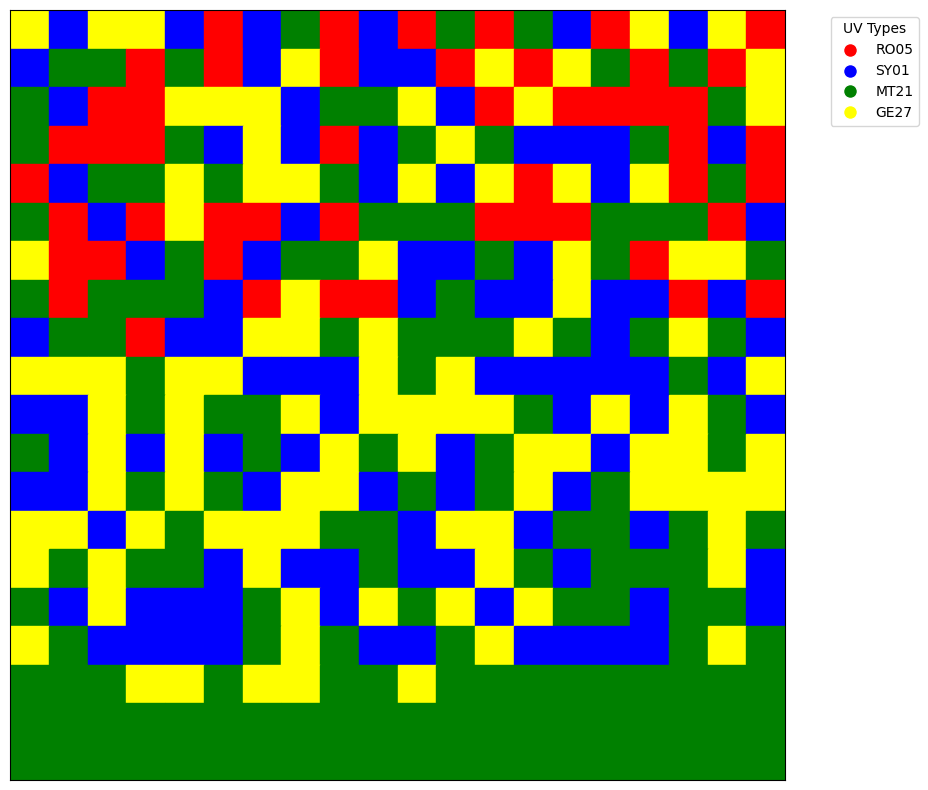

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_seat(seat):
  # 将座位列表转换为20x20的矩阵
  seating_matrix = np.array(seat).reshape(20, 20)

  # 创建一个20x20的网格用于可视化
  fig, ax = plt.subplots(figsize=(10, 10))

  uv_colors = {
    'RO05': 'red',
    'SY01': 'blue',
    'MT21': 'green',
    'GE27': 'yellow'
}

  # 使用不同的颜色代表不同的UV类型
  for i in range(20):
    for j in range(20):
        uv_type = seating_matrix[i, j]
        color = uv_colors[uv_type]
        rect = plt.Rectangle((j, i), 1, 1, color=color)
        ax.add_patch(rect)

  # 设置图形属性
  ax.set_xlim(0, 20)
  ax.set_ylim(0, 20)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.invert_yaxis()  # 矩阵的y轴与图像的y轴是相反的

  # 添加图例
  legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=uv, markersize=10, markerfacecolor=color)
                   for uv, color in uv_colors.items()]
  ax.legend(handles=legend_elements, title="UV Types", bbox_to_anchor=(1.05, 1), loc='upper left')

  plt.show()

plot_seat(seating)

In [ ]:
def calculate_energy(matrix):
    energy = 0
    # 计算每个UV类型在邻近座位上出现的次数
    for i in range(20):
        for j in range(20):
            uv = matrix[i, j]
            if i > 0 and matrix[i-1, j] == uv:
                energy += 1
            if j > 0 and matrix[i, j-1] == uv:
                energy += 1
            if i < 19 and matrix[i+1, j] == uv:
                energy += 1
            if j < 19 and matrix[i, j+1] == uv:
                energy += 1
    return energy/2
calculate_energy(seating_matrix)

258.0

In [ ]:
import random
import math
import numpy as np


# 定义能量函数
def calculate_energy(matrix):
    energy = 0
    # 计算每个UV类型在邻近座位上出现的次数
    for i in range(20):
        for j in range(20):
            uv = matrix[i, j]
            if i > 0 and matrix[i-1, j] == uv:
                energy += 1
            if j > 0 and matrix[i, j-1] == uv:
                energy += 1
            if i < 19 and matrix[i+1, j] == uv:
                energy += 1
            if j < 19 and matrix[i, j+1] == uv:
                energy += 1
    return energy/2

# 模拟退火算法
def simulated_annealing(matrix, uv_limits, max_iter=10**4, temp_init=1):
    current_matrix = np.copy(matrix)
    current_energy = calculate_energy(current_matrix)
    energy = []
    energy = np.append(energy, current_energy)

    for iter in range(max_iter):
        # 随机选择两个座位进行交换
        s = (random.randint(0, 19), random.randint(0, 19))
        s_prime = (random.randint(0, 19), random.randint(0, 19))

        # Ensure we have 2 different seats:
        while s == s_prime:
          s_prime = (random.randint(0, 19), random.randint(0, 19))

        # 生成新的配置
        new_matrix = np.copy(current_matrix)
        new_matrix[s], new_matrix[s_prime] = new_matrix[s_prime], new_matrix[s]

        # 计算新配置的能量
        new_energy = calculate_energy(new_matrix)

        # 计算能量差
        delta_energy = new_energy - current_energy

        # 决定是否接受新配置
        if delta_energy <= 0 or random.random() < math.exp(-delta_energy/temp_init):
            current_matrix = new_matrix
            current_energy = new_energy

        # 停止条件
        # if np.absolute(delta_energy) < epsilon:
        #     break
        energy = np.append(energy, current_energy)

    return current_matrix, delta_energy, current_energy, iter, energy

# 运行模拟退火算法
final_seating, delta_energy, current_energy, iter, energy1 = simulated_annealing(seating_matrix, uv_limits, temp_init = 0.1)
# print(delta_energy, current_energy)


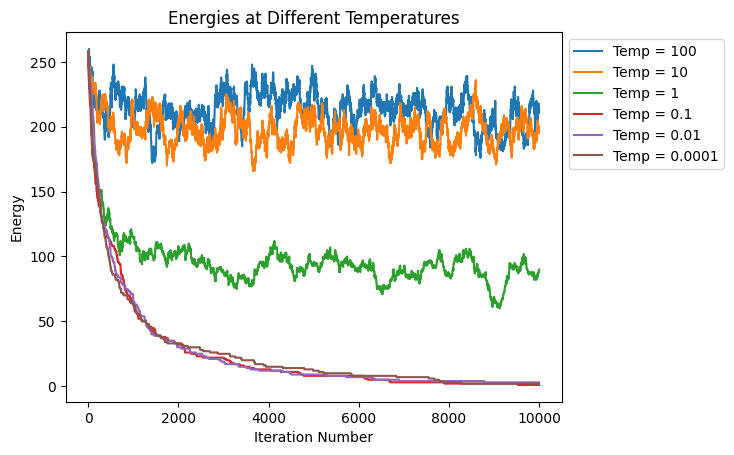

In [ ]:
temp_list = [100, 10, 1, 0.1, 0.01, 0.0001]
import matplotlib.pyplot as plt

for temp in temp_list:
  final_seating, delta_energy, current_energy, iter, energy = simulated_annealing(seating_matrix, uv_limits, temp_init=temp)
  # plot_seat(final_seating)
  plt.plot(energy, label=f'Temp = {temp}')

plt.title('Energies at Different Temperatures')
plt.xlabel('Iteration Number')
plt.ylabel('Energy')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
energy[-1]

8.0

In [ ]:
print(delta_energy, current_energy, iter)

6 58 9999


In [ ]:
max_value = 5
size = 10

# Calculating the common difference
common_difference = max_value / (size - 1)

# Generating the sequence
temp_sequence = np.linspace(0.1, max_value, size)
temp_sequence

array([0.1       , 0.64444444, 1.18888889, 1.73333333, 2.27777778,
       2.82222222, 3.36666667, 3.91111111, 4.45555556, 5.        ])

In [ ]:
energy

array([560., 560., 560., ...,  64.,  64.,  64.])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(energy)

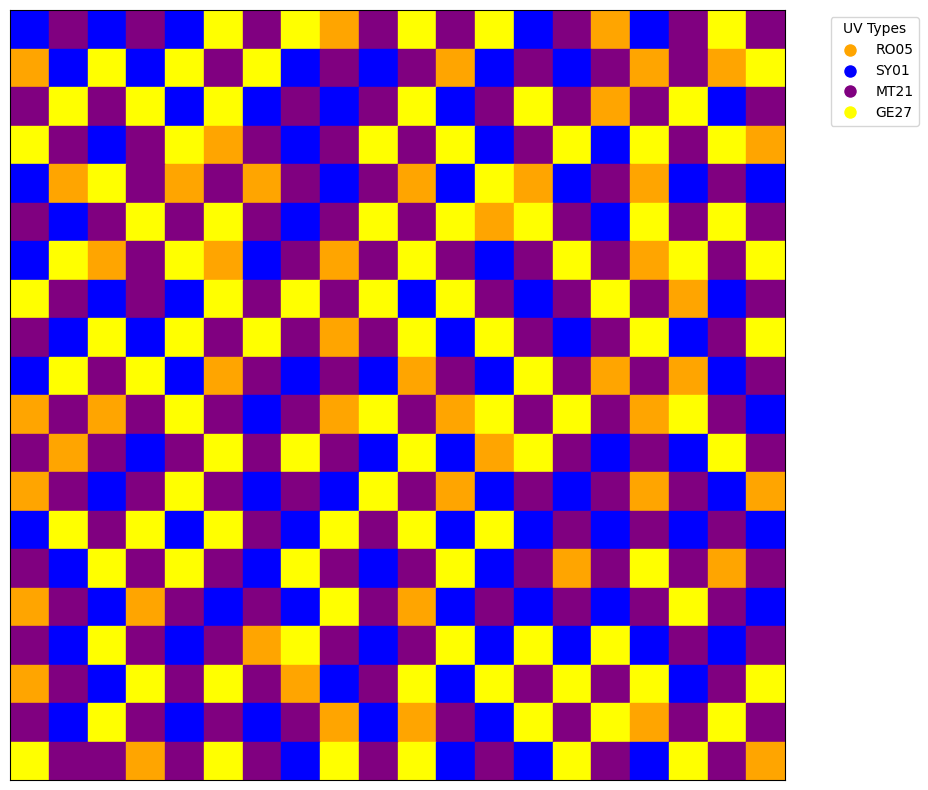

In [ ]:
plot_seat(final_seating)

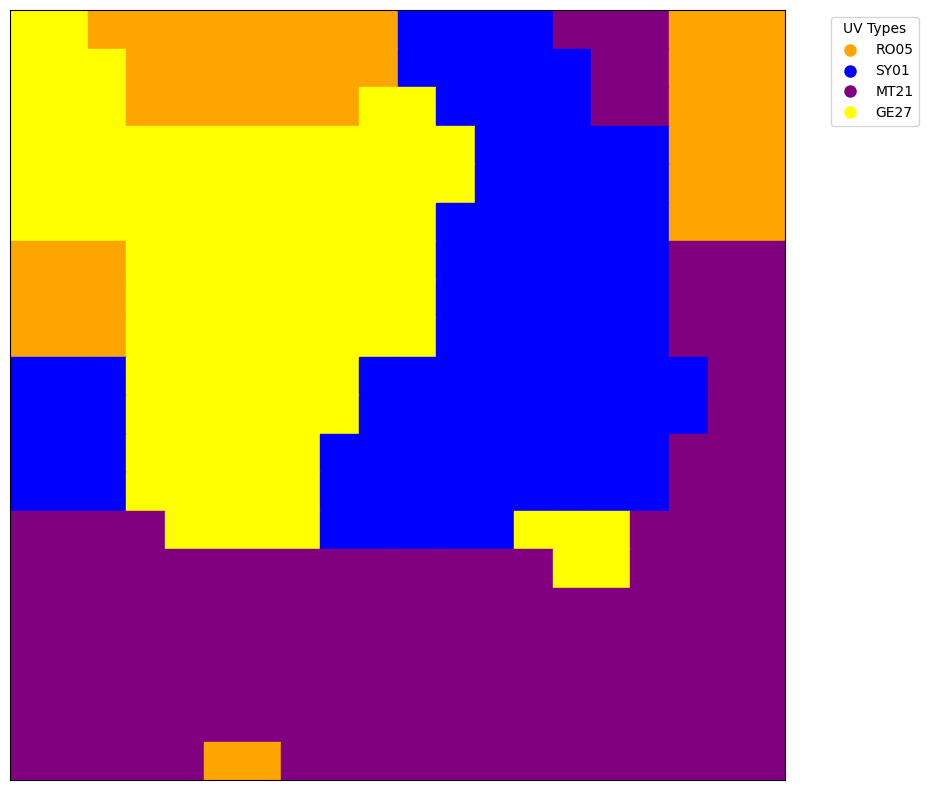

Iteration: 99900, Current Energy: 1324
-8 1324 99999


In [ ]:
import random
import math
import numpy as np
from IPython.display import clear_output

# 定义能量函数
def calculate_energy_same(matrix):
    energy = 0
    # 计算每个UV类型在邻近座位上出现的次数
    for i in range(20):
        for j in range(20):
            uv = matrix[i, j]
            if i > 0 and matrix[i-1, j] == uv:
                energy += 1
            if j > 0 and matrix[i, j-1] == uv:
                energy += 1
            if i < 19 and matrix[i+1, j] == uv:
                energy += 1
            if j < 19 and matrix[i, j+1] == uv:
                energy += 1
    return energy

# 模拟退火算法
def simulated_annealing_same(matrix, uv_limits, max_iter=10**5):
    current_matrix = np.copy(matrix)
    current_energy = calculate_energy(current_matrix)
    energy = []
    energy = np.append(energy, current_energy)

    for iter in range(max_iter):
        # 随机选择两个座位进行交换
        s = (random.randint(0, 19), random.randint(0, 19))
        s_prime = (random.randint(0, 19), random.randint(0, 19))

        # Ensure we have 2 different seats:
        while s == s_prime:
          s_prime = (random.randint(0, 19), random.randint(0, 19))

        # 生成新的配置
        new_matrix = np.copy(current_matrix)
        new_matrix[s], new_matrix[s_prime] = new_matrix[s_prime], new_matrix[s]

        # 计算新配置的能量
        new_energy = calculate_energy(new_matrix)

        # 计算能量差
        delta_energy = new_energy - current_energy

        # 决定是否接受新配置
        if delta_energy >= 0 or random.random() < 1-math.exp(-delta_energy):
            current_matrix = new_matrix
            current_energy = new_energy

        # 停止条件
        # if np.absolute(delta_energy) < epsilon:
        #     break
        if iter % 100 == 0:
            clear_output(wait=True)
            plot_seat(current_matrix)
            print(f"Iteration: {iter}, Current Energy: {current_energy}")
        energy = np.append(energy, current_energy)

    return current_matrix, delta_energy, current_energy, iter, energy

# 运行模拟退火算法
final_seating_same, delta_energy_same, current_energy_same, iter_same, energy_same = simulated_annealing_same(seating_matrix, uv_limits)
# print(delta_energy, current_energy)

print(delta_energy_same, current_energy_same, iter_same)

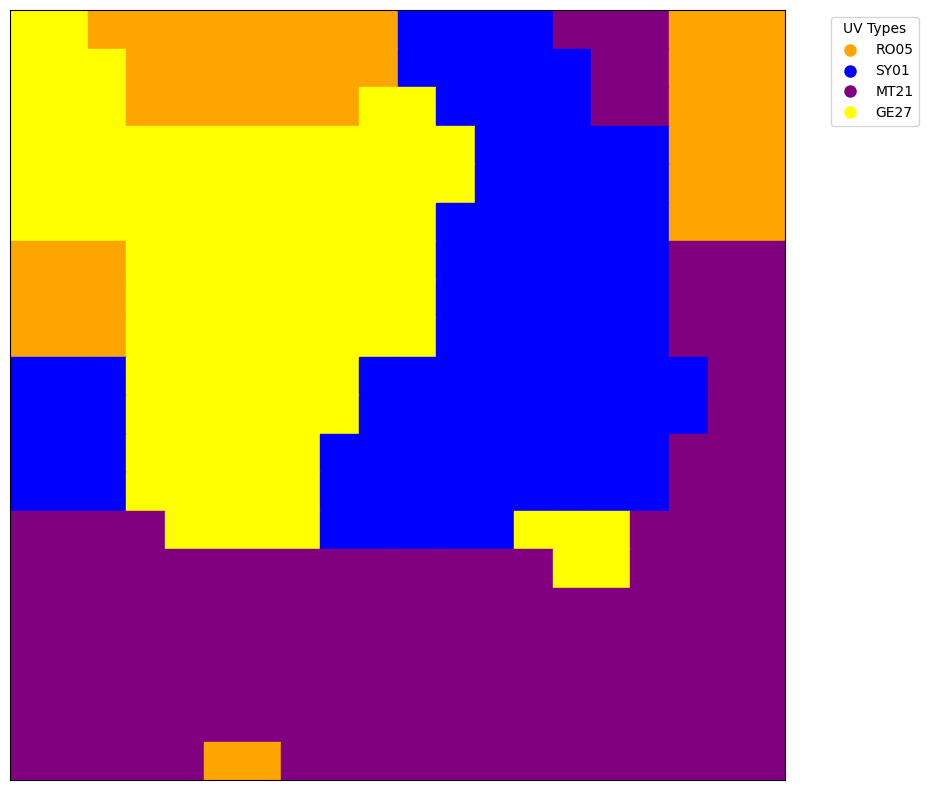

In [ ]:
plot_seat(final_seating_same)

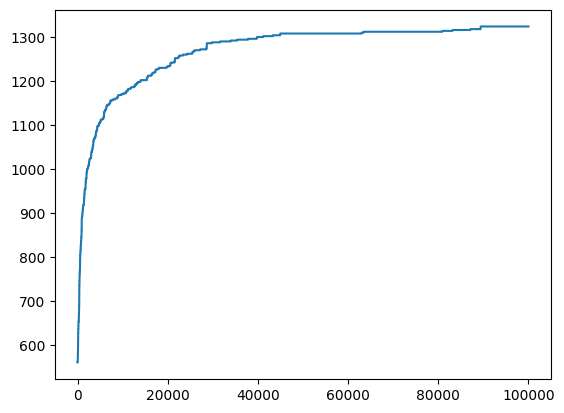

In [ ]:
import matplotlib.pyplot as plt
plt.plot(energy_same)